In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
labor_df = pd.read_csv('state_data.csv')
labor_df

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
0,Alabama,Private Nonfarm,2007,109.312,NaN,88.207,NaN,25.104,NaN,111.179,...,31.919,NaN,109.487,NaN,100544.415,NaN,97.717,NaN,131017.921,NaN
1,Alabama,Private Nonfarm,2008,105.771,-3.2,92.369,4.7,26.289,4.7,105.856,...,32.176,0.8,105.084,-4.0,96501.227,-4.0,98.359,0.7,132265.709,1.0
2,Alabama,Private Nonfarm,2009,99.487,-5.9,97.805,5.9,27.836,5.9,95.843,...,34.219,6.3,101.187,-3.7,92922.613,-3.7,100.466,2.1,125856.079,-4.8
3,Alabama,Private Nonfarm,2010,99.046,-0.4,99.169,1.4,28.224,1.4,96.281,...,33.961,-0.8,100.882,-0.3,92642.114,-0.3,99.045,-1.4,131441.376,4.4
4,Alabama,Private Nonfarm,2011,98.814,-0.2,101.158,2.0,28.790,2.0,96.638,...,33.666,-0.9,100.377,-0.5,92178.639,-0.5,99.136,0.1,137342.683,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,Private Nonfarm,2015,101.888,-2.5,106.366,0.3,33.236,0.3,99.065,...,33.465,0.6,101.302,-4.0,13946.769,-4.0,102.170,-7.3,29013.577,-6.0
659,Wyoming,Private Nonfarm,2016,97.632,-4.2,108.577,2.1,33.928,2.1,89.967,...,33.936,1.4,93.294,-7.9,12844.237,-7.9,100.301,-1.8,26989.301,-7.0
660,Wyoming,Private Nonfarm,2017,96.781,-0.9,108.974,0.4,34.051,0.4,91.464,...,33.848,-0.3,94.601,1.4,13024.103,1.4,101.756,1.5,28689.195,6.3
661,Wyoming,Private Nonfarm,2018,98.152,1.4,111.702,2.5,34.904,2.5,94.355,...,34.561,2.1,99.648,5.3,13719.076,5.3,107.349,5.5,30169.574,5.2


In [4]:
labor_df.columns

Index(['State', 'Sector', 'Year', 'Employment (2012=100)',
       'Employment (percent change)', 'Hourly labor compensation (2012=100)',
       'Hourly labor compensation (percent change)',
       'Hourly labor compensation cost ($/hour)',
       'Hourly labor compensation cost (percent change)', 'Hours (2012=100)',
       'Hours (percent change)', 'Implicit output deflator (2012=100)',
       'Implicit output deflator (percent change)',
       'Labor compensation (2012=100)', 'Labor compensation (percent change)',
       'Labor compensation cost (million $)',
       'Labor compensation cost (percent change)',
       'Labor productivity (2012=100)', 'Labor productivity (percent change)',
       'Number of employees (percent change)',
       'Number of employees (thousands)', 'Number of hours (millions)',
       'Number of hours (percent change)', 'Output (2012=100)',
       'Output (percent change)', 'Output per employee (2012=100)',
       'Output per employee (percent change)',
     

## Compare Real Hourly Labor Compensation Cost ($/hour) across the US
Look at average compensation per state over the last 5 years

In [8]:
# Narrow down our columns and get last 5 years
five_list = [2015, 2016, 2017, 2018, 2019]
hourly_comp_data = labor_df.loc[labor_df['Year'].isin(five_list),[
    'State',
    'Year', 
    'Real hourly labor compensation cost ($/hour)',
    'Real hourly labor compensation (percent change)',
    'Hourly labor compensation cost ($/hour)',
    'Hourly labor compensation cost (percent change)']]
hourly_comp_data.head()

,State,Year,Real hourly labor compensation cost ($/hour),Real hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change)
8,Alabama,2015,34.508,2.8,30.860,2.6
9,Alabama,2016,34.599,0.3,31.056,0.6
10,Alabama,2017,34.840,0.7,31.934,2.8
11,Alabama,2018,35.046,0.6,32.988,3.3
12,Alabama,2019,35.662,1.8,34.175,3.6


In [5]:
df = labor_df[[
    'State', 
    'Year', 
    'Number of employees (thousands)', 
    'Number of hours (millions)', 
    'Real hourly labor compensation cost ($/hour)',
    'Output (2012=100)',
    'Output per employee (2012=100)',
    'Unit labor cost (2012=100)'    
]]
df

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100)
0,Alabama,2007,1786.531,3150.003,31.919,100.359,91.810,97.717
1,Alabama,2008,1728.658,2999.170,32.176,99.409,93.985,98.359
2,Alabama,2009,1625.955,2715.493,34.219,93.305,93.786,100.466
3,Alabama,2010,1618.753,2727.896,33.961,96.402,97.330,99.045
4,Alabama,2011,1614.951,2738.000,33.666,98.609,99.793,99.136
...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244.891,416.763,33.465,103.133,101.222,102.170
659,Wyoming,2016,234.662,378.487,33.936,97.391,99.753,100.301
660,Wyoming,2017,232.617,384.784,33.848,97.952,101.210,101.756
661,Wyoming,2018,235.912,396.947,34.561,98.181,100.030,107.349


In [6]:
df['Number of hours (millions)'] =  df['Number of hours (millions)'] *1000000
df['Number of employees (thousands)'] = df['Number of employees (thousands)']*1000
df

C:\Users\ashfo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ashfo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100)
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,91.810,97.717
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,93.985,98.359
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,93.786,100.466
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,97.330,99.045
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,99.793,99.136
...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,101.222,102.170
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,99.753,100.301
660,Wyoming,2017,232617.0,3.847840e+08,33.848,97.952,101.210,101.756
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,100.030,107.349


In [7]:
df['hours per employee'] = df['Number of hours (millions)']/df['Number of employees (thousands)']
df

C:\Users\ashfo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100),hours per employee
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,91.810,97.717,1763.195265
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,93.985,98.359,1734.970133
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,93.786,100.466,1670.091116
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,97.330,99.045,1685.183595
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,99.793,99.136,1695.407477
...,...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,101.222,102.170,1701.830610
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,99.753,100.301,1612.902813
660,Wyoming,2017,232617.0,3.847840e+08,33.848,97.952,101.210,101.756,1654.152534
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,100.030,107.349,1682.606226


In [8]:
df['avg sal'] = df['hours per employee']* df['Real hourly labor compensation cost ($/hour)']
df

C:\Users\ashfo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100),hours per employee,avg sal
0,Alabama,2007,1786531.0,3.150003e+09,31.919,100.359,91.810,97.717,1763.195265,56279.429664
1,Alabama,2008,1728658.0,2.999170e+09,32.176,99.409,93.985,98.359,1734.970133,55824.398996
2,Alabama,2009,1625955.0,2.715493e+09,34.219,93.305,93.786,100.466,1670.091116,57148.847888
3,Alabama,2010,1618753.0,2.727896e+09,33.961,96.402,97.330,99.045,1685.183595,57230.520071
4,Alabama,2011,1614951.0,2.738000e+09,33.666,98.609,99.793,99.136,1695.407477,57077.588113
...,...,...,...,...,...,...,...,...,...,...
658,Wyoming,2015,244891.0,4.167630e+08,33.465,103.133,101.222,102.170,1701.830610,56951.761375
659,Wyoming,2016,234662.0,3.784870e+08,33.936,97.391,99.753,100.301,1612.902813,54735.469876
660,Wyoming,2017,232617.0,3.847840e+08,33.848,97.952,101.210,101.756,1654.152534,55989.754971
661,Wyoming,2018,235912.0,3.969470e+08,34.561,98.181,100.030,107.349,1682.606226,58152.553779


In [9]:
df.describe()

,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100),hours per employee,avg sal
count,663.000000,6.630000e+02,6.630000e+02,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,2013.000000,2.490072e+06,4.140016e+09,35.765291,103.071946,99.607279,102.617781,1657.791049,59267.710657
std,3.744482,2.755625e+06,4.613352e+09,3.726890,9.004079,4.885618,6.713907,44.080258,6117.776707
min,2007.000000,2.323210e+05,3.784870e+08,26.681000,57.490000,70.248000,81.591000,1517.572161,44471.117404
25%,2010.000000,6.178380e+05,1.021459e+09,33.146000,97.734500,97.195000,97.588500,1626.818021,55460.895613
50%,2013.000000,1.634341e+06,2.734767e+09,35.502000,101.211000,100.000000,101.294000,1656.846540,59221.471759
75%,2016.000000,3.120074e+06,5.041183e+09,37.869500,107.889500,102.084500,107.426500,1685.902203,62545.166476
max,2019.000000,1.658088e+07,2.754064e+10,47.965000,137.166000,114.877000,123.234000,1815.300807,81271.249045


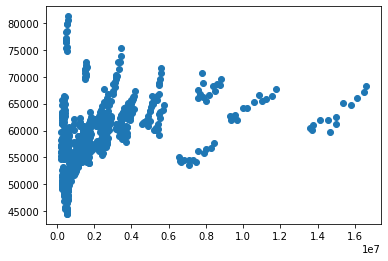

In [10]:
x= df['Number of employees (thousands)']
y= df['avg sal']

plt.scatter(x, y)

In [11]:
low = df.loc[df['avg sal'] < 50000,:]
low

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100),hours per employee,avg sal
143,Hawaii,2007,560356.0,8.898420e+08,28.023,98.320,93.754,95.720,1587.994061,44500.357569
144,Hawaii,2008,554102.0,8.852080e+08,27.837,97.565,94.084,99.021,1597.554241,44471.117404
145,Hawaii,2009,518994.0,8.216030e+08,28.448,92.181,94.906,98.246,1583.068398,45035.129778
146,Hawaii,2010,512778.0,8.274210e+08,28.202,95.176,99.177,96.699,1613.604718,45506.880252
147,Hawaii,2011,514282.0,8.396570e+08,27.700,97.093,100.879,97.188,1632.678180,45225.185599
148,Hawaii,2012,534334.0,8.867700e+08,26.985,100.000,100.000,100.000,1659.579963,44783.765304
149,Hawaii,2013,542809.0,8.803850e+08,27.617,102.193,100.598,101.325,1621.905680,44792.169152
150,Hawaii,2014,556197.0,9.137940e+08,27.430,102.711,98.674,105.782,1642.932270,45065.632177
151,Hawaii,2015,562941.0,9.166630e+08,28.511,107.104,101.662,106.660,1628.346487,46425.786704
152,Hawaii,2016,571964.0,9.147670e+08,29.504,109.612,102.401,108.630,1599.343665,47187.035492


In [12]:
oregon = df.loc[df['State'] == 'Oregon',:]
oregon

,State,Year,Number of employees (thousands),Number of hours (millions),Real hourly labor compensation cost ($/hour),Output (2012=100),Output per employee (2012=100),Unit labor cost (2012=100),hours per employee,avg sal
481,Oregon,2007,1651307.0,2.728680e+09,34.390,97.137,90.592,99.327,1652.436525,56827.292078
482,Oregon,2008,1624058.0,2.642231e+09,34.259,98.594,93.493,98.061,1626.931427,55737.043769
483,Oregon,2009,1495275.0,2.378518e+09,35.066,92.806,95.584,96.262,1590.689338,55779.112329
484,Oregon,2010,1473476.0,2.398338e+09,34.767,95.199,99.499,95.028,1627.673610,56589.328395
485,Oregon,2011,1503800.0,2.434898e+09,34.370,98.566,100.941,95.003,1619.163453,55650.647865
486,Oregon,2012,1540035.0,2.483758e+09,35.131,100.000,100.000,100.000,1612.793216,56659.038462
487,Oregon,2013,1564719.0,2.527971e+09,34.977,101.078,99.483,101.942,1615.607020,56509.086722
488,Oregon,2014,1614321.0,2.623428e+09,34.968,105.056,100.221,103.380,1625.096867,56826.387258
489,Oregon,2015,1656103.0,2.694039e+09,36.378,111.401,103.594,104.007,1626.733965,59177.328187
490,Oregon,2016,1719042.0,2.796713e+09,35.915,116.838,104.672,104.931,1626.902077,58430.188090
